In [ ]:
!python --version

Python 3.8.15


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/machine_learning/yoga-pose/sample'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/19-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/17-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/1-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/12-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/10-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/16-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/15-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/18-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/14-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/0-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/32-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/23-0.png
/content/drive/MyDrive/machine_learning/yoga-pose/sample/vajrasana/45-0.png
/content/drive

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = '/content/drive/MyDrive/machine_learning/yoga-pose/sample'

labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107
labels = labels[0:6] #len =13
print(labels)


['gomukhasana', 'natarajasana', 'padmasana', 'tadasana', 'vajrasana', 'vriksasana']


In [4]:
train_images=[]
train_labels=[]

for i,folder in enumerate(labels):
    try:
        for image in os.listdir(data_path+'/'+folder):
            img = os.path.join(data_path+'/'+folder+'/'+image)
            img = cv2.imread(img)
            img = cv2.resize(img,(256,256))
            train_images.append(img)
            train_labels.append(i)
    except:
        print(i,folder,image,img)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels).astype('int64')
print(train_images.shape)
print(train_labels.shape[0])

(384, 256, 256, 3)
384


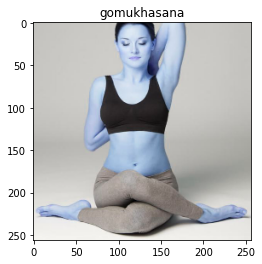

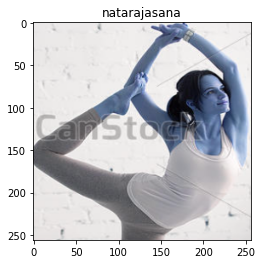

In [5]:
import matplotlib.pyplot as plt
for i in [0,115]:
    plt.imshow(train_images[i])
    plt.title(labels[train_labels[i]])
    plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 6)
print(train_labels)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [7]:
print(f'After preprocessing, our dataset has {train_images.shape[0]} images with shape {train_images.shape[1:]}')
print(f'After preprocessing, our dataset has {train_labels.shape[0]} rows with {train_labels.shape[1]} labels')


After preprocessing, our dataset has 384 images with shape (256, 256, 3)
After preprocessing, our dataset has 384 rows with 6 labels


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.1,shuffle=True)

In [9]:
print(f'After spiltting, shape of our train dataset: {X_train.shape}')
print(f'After spiltting, shape of our test dataset: {X_test.shape}')

After spiltting, shape of our train dataset: (345, 256, 256, 3)
After spiltting, shape of our test dataset: (39, 256, 256, 3)


In [10]:
import tensorflow.keras.backend  as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,\
            Dropout,Rescaling,Dense,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import load_model

In [11]:
K.clear_session()
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(256,256,3)),
            
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            Rescaling(1.0 / 255),
            
            Conv2D(32,(3,3),activation='relu'),
            MaxPooling2D((2,2)),  
            Dropout(0.3),

            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),    
            Dropout(0.3),
            
            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            
            Flatten(),
            Dense(512,activation='relu'),
            Dense(128,activation='relu'),    
            Dense(6,activation='softmax')
        
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 256, 256, 3)      0         
 tion)                                                           
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
            )

history_model = model.fit(X_train, y_train,
          batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 11s 198ms/step - loss: 3.9310 - accuracy: 0.2500 - val_loss: 1.7910 - val_accuracy: 0.2029
Epoch 2/50
9/9 [==============================] - 1s 96ms/step - loss: 1.7925 - accuracy: 0.2029 - val_loss: 1.7920 - val_accuracy: 0.2029
Epoch 3/50
9/9 [==============================] - 1s 94ms/step - loss: 1.7912 - accuracy: 0.1812 - val_loss: 1.7926 - val_accuracy: 0.2029
Epoch 4/50
9/9 [==============================] - 1s 94ms/step - loss: 1.7859 - accuracy: 0.2174 - val_loss: 1.7931 - val_accuracy: 0.1594
Epoch 5/50
9/9 [==============================] - 1s 93ms/step - loss: 1.7901 - accuracy: 0.2174 - val_loss: 1.7883 - val_accuracy: 0.2029
Epoch 6/50
9/9 [==============================] - 1s 96ms/step - loss: 1.7664 - accuracy: 0.2138 - val_loss: 1.7782 - val_accuracy: 0.2174
Epoch 7/50
9/9 [==============================] - 1s 95ms/step - loss: 1.7471 - accuracy: 0.2899 - val_loss: 1.7820 - val_accuracy: 0.2464
Epoch 8/50
9/9 [=========

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.903832733631134
Test accuracy: 0.8205128312110901


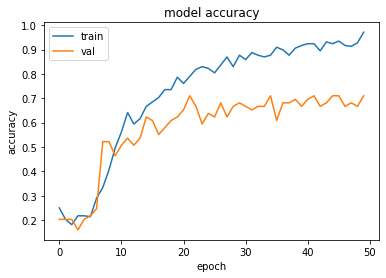

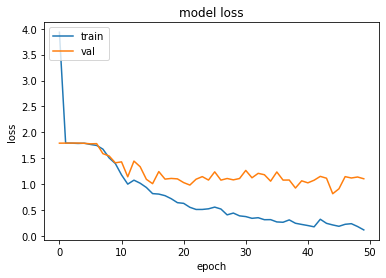

In [14]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 194ms/step


3

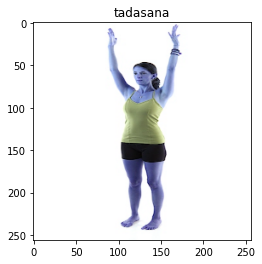

In [15]:
test_img = cv2.imread('/content/drive/MyDrive/machine_learning/yoga-pose/sample/tadasana/18. 431109_preview.png')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)

plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

### Using Transfer Learning

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))
vgg_model.trainable = False 

X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

58889256/58889256 [==============================] - 3s 0us/step


In [17]:
from tensorflow.keras import layers, models

model_tl = tf.keras.models.Sequential([
    vgg_model,
    Flatten(),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(6, activation='softmax')
])

In [18]:

from tensorflow.keras.callbacks import EarlyStopping

model_tl.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


es = EarlyStopping(monitor='val_accuracy', mode='max', 
                    patience=5,  restore_best_weights=True)

history_model_tl = model_tl.fit(X_train, y_train, epochs=50, 
                                validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
9/9 [==============================] - 10s 647ms/step - loss: 11.2115 - accuracy: 0.3514 - val_loss: 3.9411 - val_accuracy: 0.4348
Epoch 2/50
9/9 [==============================] - 2s 255ms/step - loss: 1.7572 - accuracy: 0.6558 - val_loss: 2.0260 - val_accuracy: 0.5797
Epoch 3/50
9/9 [==============================] - 2s 251ms/step - loss: 0.7720 - accuracy: 0.8007 - val_loss: 1.5632 - val_accuracy: 0.5797
Epoch 4/50
9/9 [==============================] - 2s 279ms/step - loss: 0.3209 - accuracy: 0.8949 - val_loss: 1.1405 - val_accuracy: 0.7246
Epoch 5/50
9/9 [==============================] - 2s 279ms/step - loss: 0.1194 - accuracy: 0.9384 - val_loss: 1.0988 - val_accuracy: 0.7971
Epoch 6/50
9/9 [==============================] - 2s 256ms/step - loss: 0.0622 - accuracy: 0.9746 - val_loss: 1.1419 - val_accuracy: 0.8551
Epoch 7/50
9/9 [==============================] - 2s 254ms/step - loss: 0.0398 - accuracy: 0.9819 - val_loss: 1.1072 - val_accuracy: 0.8551
Epoch 8/50
9/9 [==

In [19]:
score_tl = model_tl.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_tl[0])
print("Test accuracy:", score_tl[1])

Test loss: 1.7606912851333618
Test accuracy: 0.8974359035491943


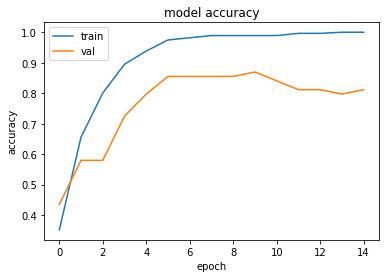

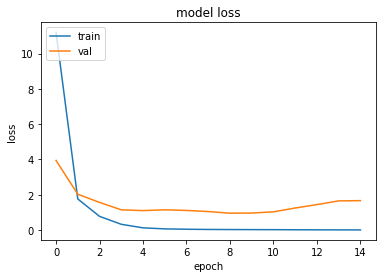

In [20]:
plt.plot(history_model_tl.history['accuracy'])
plt.plot(history_model_tl.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model_tl.history['loss'])
plt.plot(history_model_tl.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 625ms/step
0.9979097
['gomukhasana', 'natarajasana', 'padmasana', 'tadasana', 'vajrasana', 'vriksasana']


3

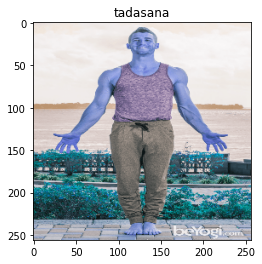

In [21]:
test_img = cv2.imread('/content/drive/MyDrive/machine_learning/yoga-pose/sample/tadasana/29. mountain-pose-tadasana1.png')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model_tl.predict(test_img)
print(np.max(p))
print(labels)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

gomukhasana


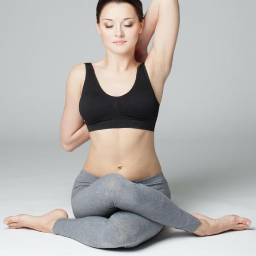

natarajasana


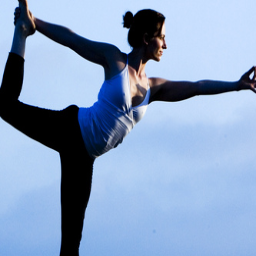

padmasana


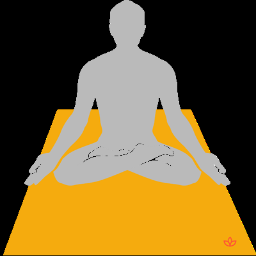

tadasana


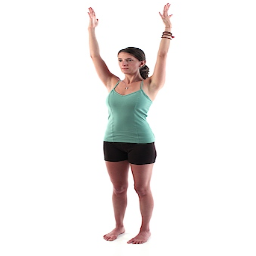

vajrasana


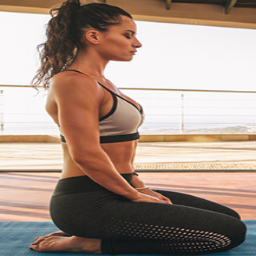

vriksasana


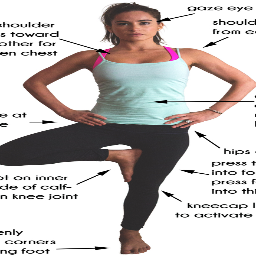

In [22]:
from google.colab.patches import cv2_imshow
for i,folder in enumerate(labels):
        for image in os.listdir(data_path+'/'+folder):
            img = os.path.join(data_path+'/'+folder+'/'+image)
            img = cv2.imread(img)
            img = cv2.resize(img,(256,256))
            print(folder)
            cv2_imshow(img)
            break


In [25]:
import os.path
if os.path.isfile('/content/drive/MyDrive/machine_learning/yoga-pose/saved_model/yoga_6model.h5') is False:
  model.save('/content/drive/MyDrive/machine_learning/yoga-pose/saved_model/yoga_6model.h5')

In [ ]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model_tl)
  
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions

test_img = cv2.imread('/content/drive/MyDrive/machine_learning/yoga-pose/dataset_extracted/ardha bhekasana/29-0.png')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
knn_from_pickle.predict(test_img)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

In [ ]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(model_tl, 'filename.pkl')
  
# Load the model from the file
knn_from_joblib = joblib.load('filename.pkl')
  
# Use the loaded model to make predictions
knn_from_joblib.predict(test_img)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cam=cv2.VideoCapture(0)
fps=int(cam.get(cv2.CAP_PROP_FPS))
print(fps)
n=0
i=0
res=(360,240) #resulotion
fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
out = cv2.VideoWriter('video.mp4', fourcc, 20.0, res)
while (True):
    print('abc')
    ret,frame=cam.read()
    out.write(frame)
    if ret==False:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    if(n%fps==0):
        print('abc')
        
        cv2.imwrite('/content/Frames_Captured/Frame'+str(i)+'.jpg',frame)
        i+=1
    n+=1

out.release()
cam.release()
cv2.destroyAllWindows()





In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cam=cv2.VideoCapture(0)
fps=int(cam.get(cv2.CAP_PROP_FPS))
print(fps)
n=0
i=0

while (True):
    print('abc')
    ret,frame=cam.read()
    # cv2_imshow('frame',frame)
    if ret==False:
        break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    if(n%fps==0):
        print('abc')
        
        cv2.imwrite(r'C:\Users\UPLAV DANG\Desktop\python_webdev\Yoga-pose-estimate\Captured_frames\Frame'+str(i)+'.jpg',frame)
        i+=1
    n+=1


cam.release()
cv2.destroyAllWindows()



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))